<a href="https://colab.research.google.com/github/pxs1990/python_data_science/blob/main/preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Data Preprocessing**

In [60]:
#Example 1
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

data = {
    'SquareFeet': [1500, 2000, 1700, None, 1300],
    'Bedrooms': [3, 4, 3, 4, None],
    'Location': ['City', 'City', None, 'Hood', 'City'],
    'Price': [300000, 400000, 250000, 270000, 480000]
}
df = pd.DataFrame(data)

# Separating dependent and independent variables
y = df['Price'].values
X = df.drop('Price', axis=1).values

# Handling missing values in numerical columns with the 'mean' strategy
numerical_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X[:, :2] = numerical_imputer.fit_transform(X[:, :2])

# Handling missing values in the categorical column ('Location') with the 'most frequent' strategy
categorical_imputer = SimpleImputer(missing_values=None, strategy='most_frequent')
X[:, 2] = categorical_imputer.fit_transform(X[:, 2].reshape(-1, 1)).flatten()
print('df after imputing missing values:')
print(X)

# Apply OneHotEncoder to the categorical column ('Location')
ct = ColumnTransformer(transformers=[
    ('keeping first two col', 'passthrough', [0, 1]),  # Keep the first two columns unchanged
    ('encoder', OneHotEncoder(), [2])  # Encode the third column ('Location')
], remainder='drop')  # 'drop' ignores other columns not specified
X = np.array(ct.fit_transform(X))
print('\ndf with incoded categorical data:')
print(X)

# splitting the data for trainning and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 1/5, random_state=0)# random state=0 means it reproduces the same split in every run
print(f"X_train df:\n {X_train}, \nX_test df:\n {X_test}, \ny_train df:\n {y_train}, \ny_test df:\n {y_test}")


# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, :2] = sc.fit_transform(X_train[:, :2])
X_test[:, :2] = sc.transform(X_test[:, :2])
print('\ndf after normalization:')
X_train, X_test

df after imputing missing values:
[[1500.0 3.0 'City']
 [2000.0 4.0 'City']
 [1700.0 3.0 'City']
 [1625.0 4.0 'Hood']
 [1300.0 3.5 'City']]

df with incoded categorical data:
[[1500.0 3.0 1.0 0.0]
 [2000.0 4.0 1.0 0.0]
 [1700.0 3.0 1.0 0.0]
 [1625.0 4.0 0.0 1.0]
 [1300.0 3.5 1.0 0.0]]
X_train df:
 [[1500.0 3.0 1.0 0.0]
 [2000.0 4.0 1.0 0.0]
 [1625.0 4.0 0.0 1.0]
 [1300.0 3.5 1.0 0.0]], 
X_test df:
 [[1700.0 3.0 1.0 0.0]], 
y_train df:
 [300000 400000 270000 480000], 
y_test df:
 [250000]

df after normalization:


(array([[-0.41637162119267096, -1.507556722888818, 1.0, 0.0],
        [1.5430242432434276, 0.9045340337332909, 1.0, 0.0],
        [0.0734773449163537, 0.9045340337332909, 0.0, 1.0],
        [-1.2001299669671104, -0.30151134457776363, 1.0, 0.0]],
       dtype=object),
 array([[0.36738672458176846, -1.507556722888818, 1.0, 0.0]], dtype=object))

In [16]:
#Example 2
import pandas as pd
path='/content/data.csv'
df=pd.read_csv(path)
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


### **independent and dependent variables**


In [17]:
X= df.iloc[:, :-1].values #independent values
y= df.iloc[:,-1].values #dependent values

In [18]:
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [19]:
y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

### **Handling Missing Data**

In [20]:
#imputing the missing values
import numpy as np
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X[:, 1:3] =imputer.fit_transform(X[:, 1:3])
# imputer.fit(X[:, 1:3])# impute in 2nd & 3rd col
# X[:, 1:3] = imputer.transform(X[:, 1:3])#transforming and assigning the change to X
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

### **Encoding categorical data-into machine readable data**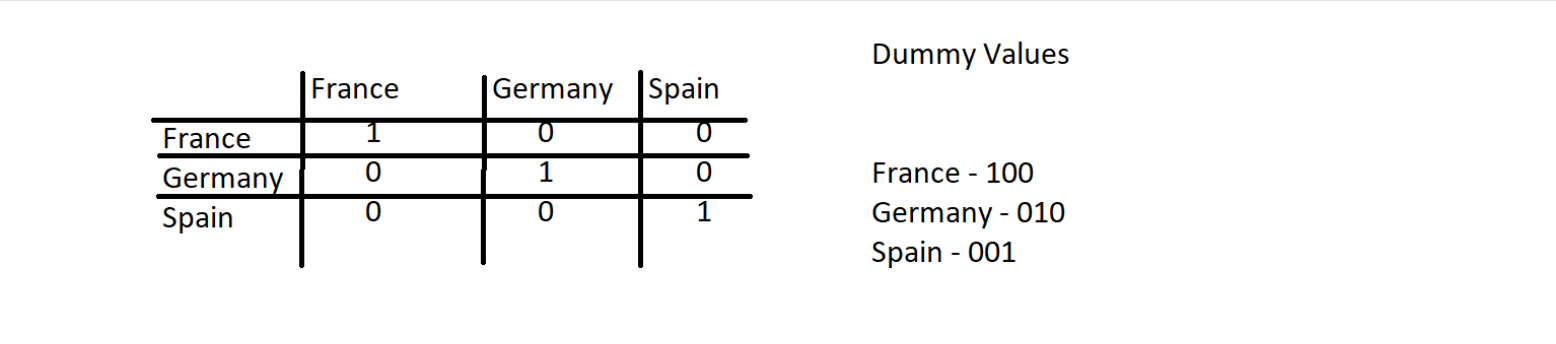

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder#creates dummy var for cat_data
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(handle_unknown='ignore'), [0])], remainder='passthrough')# encoding 1st col
X = np.array(ct.fit_transform(X))


In [ ]:
X

array([[1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 0.0, 35.0, 58000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

In [ ]:
#labe encoding for ind var-y(ordinal data=with order)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

## **Splitting the dataset into the Training set and Test set**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 1/5, random_state=0)

In [ ]:
X_train, X_test, y_train, y_test

(array([[0.0, 1.0, 0.0, 1.0, 0.0, 40.0, 63777.77777777778],
        [1.0, 0.0, 1.0, 0.0, 0.0, 37.0, 67000.0],
        [0.0, 1.0, 0.0, 0.0, 1.0, 27.0, 48000.0],
        [0.0, 1.0, 0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
        [1.0, 0.0, 1.0, 0.0, 0.0, 48.0, 79000.0],
        [0.0, 1.0, 0.0, 0.0, 1.0, 38.0, 61000.0],
        [1.0, 0.0, 1.0, 0.0, 0.0, 44.0, 72000.0],
        [1.0, 0.0, 1.0, 0.0, 0.0, 35.0, 58000.0]], dtype=object),
 array([[0.0, 1.0, 0.0, 1.0, 0.0, 30.0, 54000.0],
        [0.0, 1.0, 0.0, 1.0, 0.0, 50.0, 83000.0]], dtype=object),
 array([1, 1, 1, 0, 1, 0, 0, 1]),
 array([0, 0]))

### **Feature Selection**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 3:] = sc.fit_transform(X_train[:, 3:])
X_test[:, 3:] = sc.transform(X_test[:, 3:])

In [ ]:
X_train

array([[0.0, 1.0, 0.0, 2.6457513110645903, -0.7745966692414834,
        0.2630675731713538, 0.1238147854838185],
       [1.0, 0.0, 1.0, -0.3779644730092272, -0.7745966692414834,
        -0.25350147960148617, 0.4617563176278856],
       [0.0, 1.0, 0.0, -0.3779644730092272, 1.2909944487358056,
        -1.9753983221776195, -1.5309334063940294],
       [0.0, 1.0, 0.0, -0.3779644730092272, 1.2909944487358056,
        0.05261351463427101, -1.1114197802841526],
       [1.0, 0.0, 1.0, -0.3779644730092272, -0.7745966692414834,
        1.6405850472322605, 1.7202971959575162],
       [0.0, 1.0, 0.0, -0.3779644730092272, 1.2909944487358056,
        -0.08131179534387283, -0.16751412153692966],
       [1.0, 0.0, 1.0, -0.3779644730092272, -0.7745966692414834,
        0.9518263102018072, 0.9861483502652316],
       [1.0, 0.0, 1.0, -0.3779644730092272, -0.7745966692414834,
        -0.5978808481167128, -0.48214934111933727]], dtype=object)

In [15]:
# Example 3
import numpy as np
import pandas as pd
path='/content/camera.csv'
df= pd.read_csv(path)
df

,Colour,Length,Pixel,Purchased
0,Red,44.0,72000.0,No
1,Yellow,27.0,48000.0,Yes
2,Blue,30.0,54000.0,No
3,Yellow,38.0,61000.0,No
4,Blue,40.0,NaN,Yes
5,Red,35.0,58000.0,Yes
6,Yellow,NaN,52000.0,No
7,Red,48.0,79000.0,Yes
8,Blue,50.0,83000.0,No
9,Red,37.0,67000.0,Yes


In [5]:
# Seperating independent and dependent variables
y = df['Purchased'].values
X = df.drop('Purchased', axis=1).values
print(y)
print(X)

['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']
[['Red' 44.0 72000.0]
 ['Yellow' 27.0 48000.0]
 ['Blue' 30.0 54000.0]
 ['Yellow' 38.0 61000.0]
 ['Blue' 40.0 nan]
 ['Red' 35.0 58000.0]
 ['Yellow' nan 52000.0]
 ['Red' 48.0 79000.0]
 ['Blue' 50.0 83000.0]
 ['Red' 37.0 67000.0]]


In [6]:
# Handling missing values in numerical columns with the 'mean' strategy
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X[:, 1:3] = imputer.fit_transform(X[:, 1:3])
print('df after imputing missing values:')
print(X)

df after imputing missing values:
[['Red' 44.0 72000.0]
 ['Yellow' 27.0 48000.0]
 ['Blue' 30.0 54000.0]
 ['Yellow' 38.0 61000.0]
 ['Blue' 40.0 63777.77777777778]
 ['Red' 35.0 58000.0]
 ['Yellow' 38.77777777777778 52000.0]
 ['Red' 48.0 79000.0]
 ['Blue' 50.0 83000.0]
 ['Red' 37.0 67000.0]]


In [10]:
# Apply ColumnTransformation to encode categorical data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoding', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print('\ndf with incoded categorical data:')
print(X)


df with incoded categorical data:
[[0.0 1.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [1.0 0.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [1.0 0.0 0.0 40.0 63777.77777777778]
 [0.0 1.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 38.77777777777778 52000.0]
 [0.0 1.0 0.0 48.0 79000.0]
 [1.0 0.0 0.0 50.0 83000.0]
 [0.0 1.0 0.0 37.0 67000.0]]


In [11]:
#labe encoding for ind var-y(ordinal data=with order)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

In [13]:
# seperating train data and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 1/5, random_state=0)
X_train, X_test, y_train, y_test

(array([[1.0, 0.0, 0.0, 40.0, 63777.77777777778],
        [0.0, 1.0, 0.0, 37.0, 67000.0],
        [0.0, 0.0, 1.0, 27.0, 48000.0],
        [0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
        [0.0, 1.0, 0.0, 48.0, 79000.0],
        [0.0, 0.0, 1.0, 38.0, 61000.0],
        [0.0, 1.0, 0.0, 44.0, 72000.0],
        [0.0, 1.0, 0.0, 35.0, 58000.0]], dtype=object),
 array([[1.0, 0.0, 0.0, 30.0, 54000.0],
        [1.0, 0.0, 0.0, 50.0, 83000.0]], dtype=object),
 array([1, 1, 1, 0, 1, 0, 0, 1]),
 array([0, 0]))

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 3:] = sc.fit_transform(X_train[:, 3:])
X_test[:, 3:] = sc.transform(X_test[:, 3:])
X_train,X_test

(array([[1.0, 0.0, 0.0, 0.2630675731713538, 0.1238147854838185],
        [0.0, 1.0, 0.0, -0.25350147960148617, 0.4617563176278856],
        [0.0, 0.0, 1.0, -1.9753983221776195, -1.5309334063940294],
        [0.0, 0.0, 1.0, 0.05261351463427101, -1.1114197802841526],
        [0.0, 1.0, 0.0, 1.6405850472322605, 1.7202971959575162],
        [0.0, 0.0, 1.0, -0.08131179534387283, -0.16751412153692966],
        [0.0, 1.0, 0.0, 0.9518263102018072, 0.9861483502652316],
        [0.0, 1.0, 0.0, -0.5978808481167128, -0.48214934111933727]],
       dtype=object),
 array([[1.0, 0.0, 0.0, -1.4588292694047795, -0.9016629672292141],
        [1.0, 0.0, 0.0, 1.984964415747487, 2.139810822067393]],
       dtype=object))